In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("HR_data.csv")
data = data.astype({"Frustrated": str})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  168 non-null    int64  
 1   HR_Mean     168 non-null    float64
 2   HR_Median   168 non-null    float64
 3   HR_std      168 non-null    float64
 4   HR_Min      168 non-null    float64
 5   HR_Max      168 non-null    float64
 6   HR_AUC      168 non-null    float64
 7   Round       168 non-null    object 
 8   Phase       168 non-null    object 
 9   Individual  168 non-null    int64  
 10  Puzzler     168 non-null    int64  
 11  Frustrated  168 non-null    object 
 12  Cohort      168 non-null    object 
dtypes: float64(6), int64(3), object(4)
memory usage: 17.2+ KB


In [4]:
column = "Cohort"
" & ".join([str(x) for x in data[column].values[:5]])

'D1_1 & D1_1 & D1_1 & D1_1 & D1_1'

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

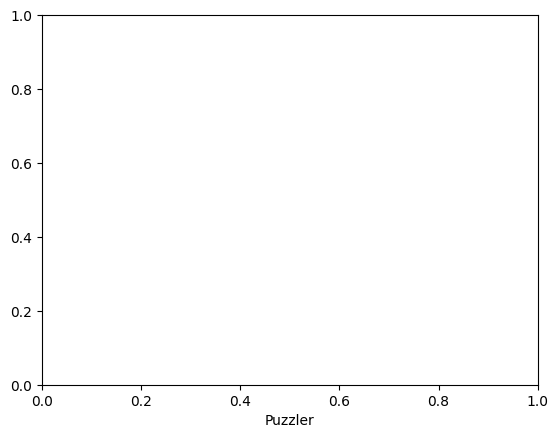

In [5]:
data.boxplot(column=["Frustrated"], by="Puzzler")

<Axes: title={'center': 'HR_Mean'}, xlabel='Puzzler'>

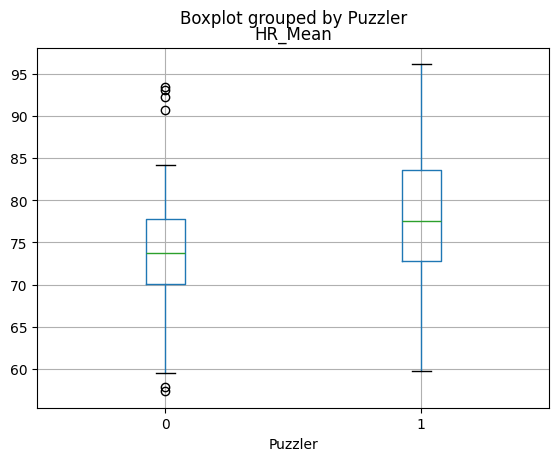

In [ ]:
data.boxplot(column=["HR_Mean"], by="Puzzler")

<Axes: title={'center': 'HR_Mean'}, xlabel='Individual'>

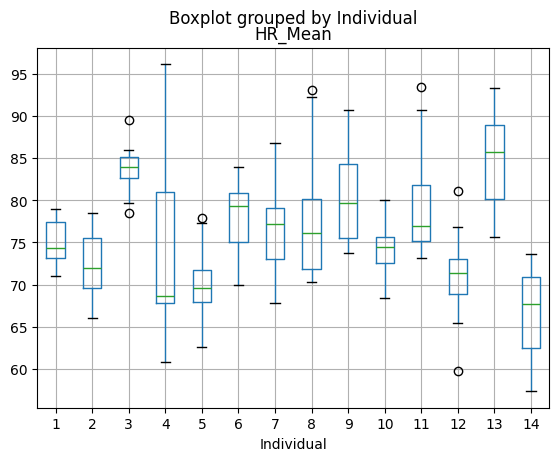

In [ ]:
data.boxplot(column=["HR_Mean"], by="Individual")

<Axes: title={'center': 'HR_Mean'}, xlabel='Frustrated'>

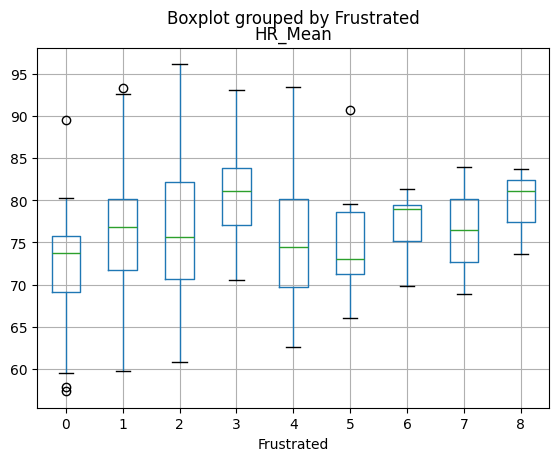

In [ ]:
data.boxplot(column=["HR_Mean"], by="Frustrated")

Classification

In [6]:
def frust_class(x):
    if int(x) <= 3:
        return "Low" 
    if int(x) <= 7:
        return "Medium"
    else:
        return "High"

data["frust_class"] = data["Frustrated"].apply(frust_class)
data[data["Individual"] == 1]

,Unnamed: 0,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort,frust_class
0,0,77.965186,78.000,3.345290,73.23,83.37,22924.945,round_3,phase3,1,1,1,D1_1,Low
1,1,70.981097,70.570,2.517879,67.12,78.22,21930.400,round_3,phase2,1,1,5,D1_1,Medium
2,2,73.371959,73.360,3.259569,67.88,80.22,21647.085,round_3,phase1,1,1,0,D1_1,Low
3,3,78.916822,77.880,4.054595,72.32,84.92,25258.905,round_2,phase3,1,1,1,D1_1,Low
4,4,77.322226,74.550,6.047603,70.52,90.15,23890.565,round_2,phase2,1,1,5,D1_1,Medium
5,5,74.372061,74.050,2.061858,71.27,79.22,21940.505,round_2,phase1,1,1,0,D1_1,Low
6,6,77.253401,77.750,3.204755,72.43,82.90,22867.070,round_4,phase3,1,1,0,D1_1,Low
7,7,72.699901,72.750,2.692685,66.25,77.12,21880.330,round_4,phase2,1,1,4,D1_1,Medium
8,8,73.890960,74.370,3.479808,67.48,80.85,23789.395,round_4,phase1,1,1,0,D1_1,Low
9,9,72.625483,72.275,3.687537,67.55,81.78,20985.990,round_1,phase3,1,1,2,D1_1,Low


In [15]:
individual_dummies = pd.get_dummies(data["Individual"])
df = pd.concat([data, pd.get_dummies(data["Individual"])], axis=1, join="inner")
df.columns

Index([ 'Unnamed: 0',     'HR_Mean',   'HR_Median',      'HR_std',
            'HR_Min',      'HR_Max',      'HR_AUC',       'Round',
             'Phase',  'Individual',     'Puzzler',  'Frustrated',
            'Cohort', 'frust_class',             1,             2,
                   3,             4,             5,             6,
                   7,             8,             9,            10,
                  11,            12,            13,            14],
      dtype='object')